1. Loading the data 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
iris = load_iris(as_frame=True)
df = iris.frame
df['species'] = df['target'].map(dict(zip(range(3), iris.target_names)))


In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


2. Understanding the data

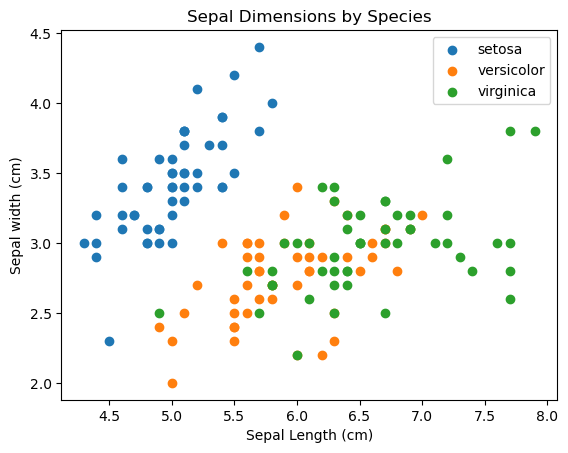

In [22]:
plt.figure()
for spec in df['species'].unique():
    subset = df[df['species']==spec]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=spec)
plt.legend()
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Sepal Dimensions by Species")
plt.show()

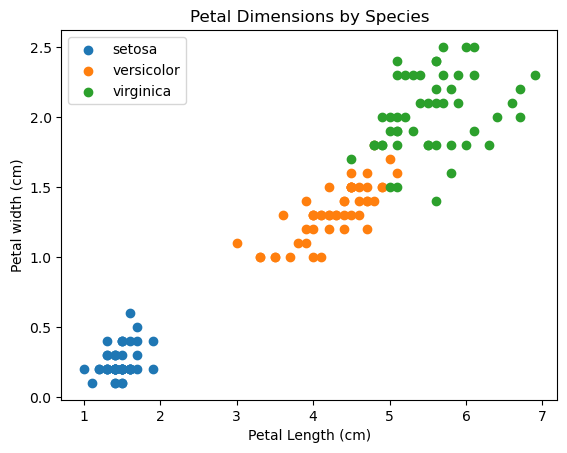

In [23]:
plt.figure()
for spec in df['species'].unique():
    subset = df[df['species']==spec]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=spec)
plt.legend()
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Petal Dimensions by Species")
plt.show()

Understanding -- 

Here we can understand that the petal dimensions by species are good for training model because it has very much difference in there petal size. 

setosa is very much seperate from other two
versicolor and virginica is little bit close to each other 

3. Train/Test Split & Model Training

In [24]:
# seperating Features and labels
X = df.drop(columns=['target','species'])
y = df['target']

# Split 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


4. Evaluation of Model

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



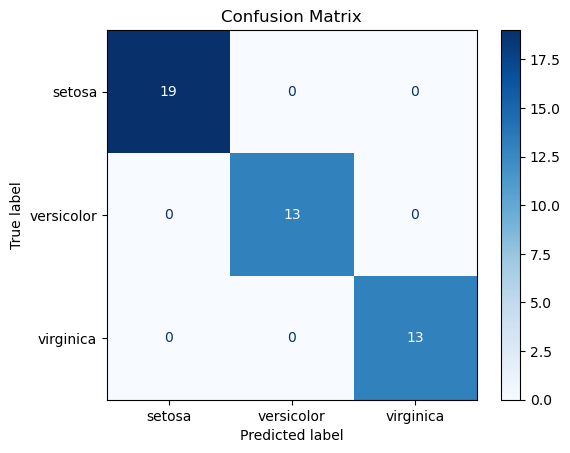

In [25]:
# prediction
y_pred = model.predict(X_test)

# accuracy and detailed report
print("Classification Report:\n\n", classification_report(y_test,y_pred, target_names=iris.target_names))

# confussion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
